<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Martín Sepúlveda
- Nombre de alumno 2: Maximiliano Varas


### **Link de repositorio de GitHub:** `https://github.com/mvarasg/labs-sepulveda-varas`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [2]:
# Libreria Core del lab.
import numpy as np
# !pip install --upgrade pandas
# !pip install xlrd
# !pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
# !pip install --upgrade plotly
# !pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [3]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [4]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis unitivariable se refiere a la obtención de estadísticas y graficos de cada una de las características del dataset de forma separada, es decir, no se buscan relaciones entre las series. En cambio, el análisis multivariado obtiene estadísticas y graficos de más de una variables (en conjunto) y obtiene relaciones entre las variables. Es muy útil realizar un análisis exploratorio de los datos dado que se puede tener una idea rápida de los datos, como puede ser distribución, estadísticos, cantidad de nulos, repetidos, relaciones entre variables, etc.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [28]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()
    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])


    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [26]:
print(f'Las series disponibles en el dataframe son: {np.array(df_retail.columns)}')

Las series disponibles en el dataframe son: ['Invoice' 'StockCode' 'Description' 'Quantity' 'InvoiceDate' 'Price'
 'Customer ID' 'Country']


    Análisis de la primera serie "Invoice"

In [29]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338390 bytes
dtype: object

Al realizar un análsis univariado de la serie ```Invoice``` se obtiene que los datos son categoricos, con un total de ```525.461``` datos en la serie, de estos hay ```28.816``` valores únicos. El valor con que más se repite es el ```537.434``` con una frecuencia de ```675```. No se tienen filas con valores nulos y en total hay ```517.456``` filas repetidas, lo que representa un ```98.48 %``` de los datos. El gráfico muestra los valores más comunes de la serie.

    Análisis de la segunda serie "StockCode"

In [31]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220246 bytes
dtype: object

Al realizar un análsis univariado de la serie ```StockCode``` se obtiene que los datos son categoricos, con un total de ```525.461``` datos en la serie, de estos hay ```4.632``` valores únicos. El valor con que más se repite es el ```85123A``` con una frecuencia de ```3.516```. No se tienen filas con valores nulos y en total hay ```525.026``` filas repetidas, lo que representa un ```99.92 %``` de los datos.

    Análisis de la tercera serie "Description"

In [11]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Al realizar un análsis univariado de la serie ```Description``` se obtiene que los datos son categoricos, con un total de ```525.461``` datos en la serie, de estos hay ```4.682``` valores únicos. El valor con que más se repite es el ```WHITE HANGING HEART T-LIGHT HOLDER``` con una frecuencia de ```3.549```. No se tienen filas con valores nulos y en total hay ```525,198``` filas repetidas, lo que representa un ```99.95 %``` de los datos. Esta serie da la descripción de los productos vendidos y el gráfico muestra cuales son los que más ventas tienen.

    Análisis de la cuarta serie "Quantity"

In [32]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203820 bytes
dtype: object

Al realizar un análsis univariado de la serie ```Description``` se obtiene que los datos son numéricos, en particular, ```int64```, con un total de ```525.461``` datos en la serie. Se tiene que hay ```525.122``` valores duplicados y no hay nulos. Se puede ver que los estadísticos muestran que el valor mínimo es ```-9600.0``` y el máximo ```19152.0```. Por otro lado, se entregan valores de media, desviación estándar, skew, kurt, etc. Algo a tener en cuenta es que hay valores negativos, cosa que es rara dado que es una cantidad, por lo que se puede deber a un error. Los gráficos mostrados muestran un histograma junto con un box plot, la diferencia entre ambos es que en el segundo se eliminan los outliers, lo que da una vista más centrada en los datos relevantes.

    Análisis de la quinta serie "InvoiceDate"

In [13]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

De la serie "InvoiceData" se obtiene que el tipo de valores es de ```datetime64[ns]``` y muestra la fecha en la que se realizó la venta. Se observan ```525.461``` datos (filas) y se obtienen datos estadísticos como el mínimo, máximo, promedio y los cuartiles. Por ejemplo, se puede ver que la primera compra se realizó el ```2009-12-01``` y la última el ```2010-12-09```. No hay datos nulos y en total hay ```520.400``` valores repetidos, lo que representa un ```99.04 %``` de los datos. El grafico presentado muestra un histograma con la cantidad de ventas por día y el boxplot muestra cómo se distribuyen los datos.

    Análisis de la sexta serie "Price"

In [18]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

La serie ```Price``` es el precio de los productos vendidos, por lo que el tipo de datos es númerico, en específico, ```float64```. El profile entrega que el valor mínimo es ```-53594.36``` y el máximo es ```25111.09```, donde claramente hay un error en los datos porque no pueden haber ventas con precio negativo. Se tienen en total ```3``` valores negativos y ```3.687``` valores con precio igual a cero, que también puede ser un error. En ambos gráficos se muestran los histogramas junto con su boxplot para los datos, solo que en el segundo caso se realiza una eliminación de outliers. Es directo notar que el primer gráfico no aporta mucho a la visualización de los datos dados los outliers, cosa que mejora un poco al eliminar algunos. Quizás se deberían eliminar más outliers dado que aún se tiene una visualización deficiente.

    Análisis de la séptima serie "Customer ID"

In [14]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

En la serie se muestra los ids de los clientes que realizan las compras (tipo categorico), donde se tienen datos interesantes respecto a los casos anteriores. Notar que en este caso hay un cliente de id ```14911.0``` que ha comprado con una frecuencia de ```5710```, muchas comprar para ser un mismo cliente, pero puede explicarse por multiples razones, como por ejemplo que muchas personas utilicen su id, como suele hacerse en Chile al utilizar el rut de algún familiar para acumular puntos o obtener descuentos. También se tiene una gran cantidad de valores nulos, lo que indica que se tienen ```107.927``` no registrados, lo que representa un  ```20.54 %``` de las transacciones. El gráfico muestran los clientes que más comprar en el supermercado.

    Análisis de la octava serie "Country"

In [15]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Esta serie entrega la nacionalidad del comprador, donde es directo notar que el grueso de los compradores son del Reino Unido, con una frecuencia de ```485.852```, lo que representa un ```92.46 %``` de los datos. En total se tiene 40 paises y el total de las ventas se repiten con esas nacionalidades. El gráfico muestra como ```United Kingdom``` es la nacionalidad preponderante.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [36]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

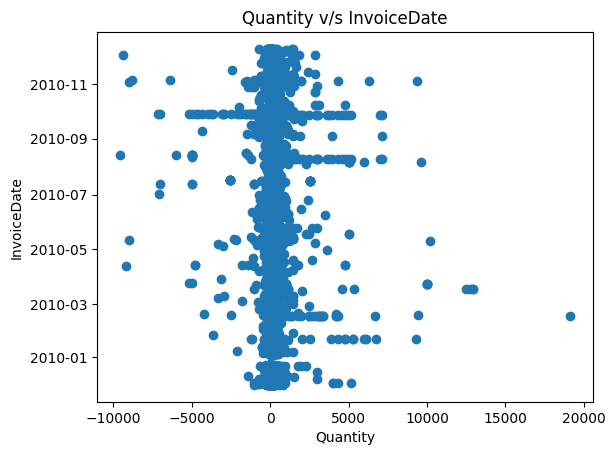

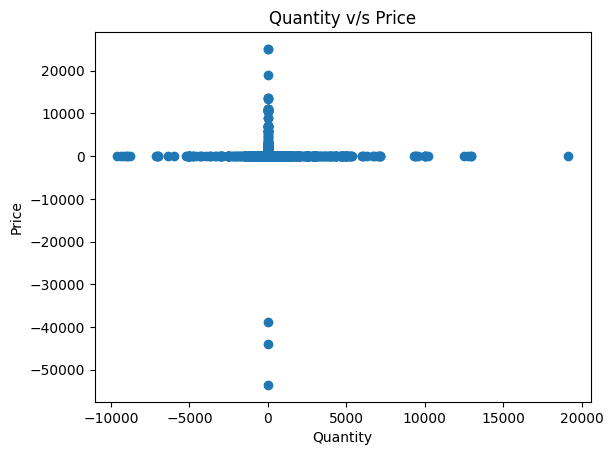

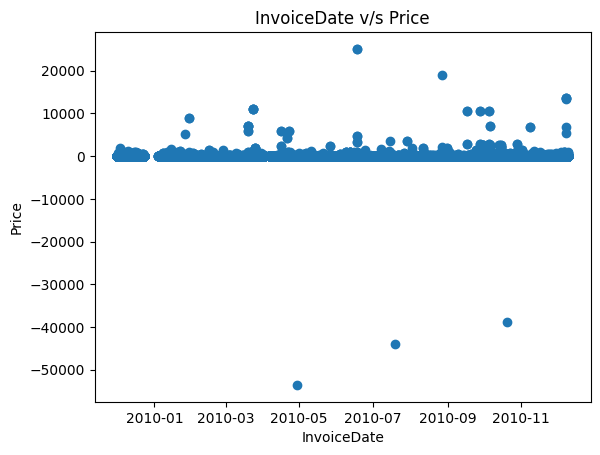

## Correlation:

## Missing Matrix:

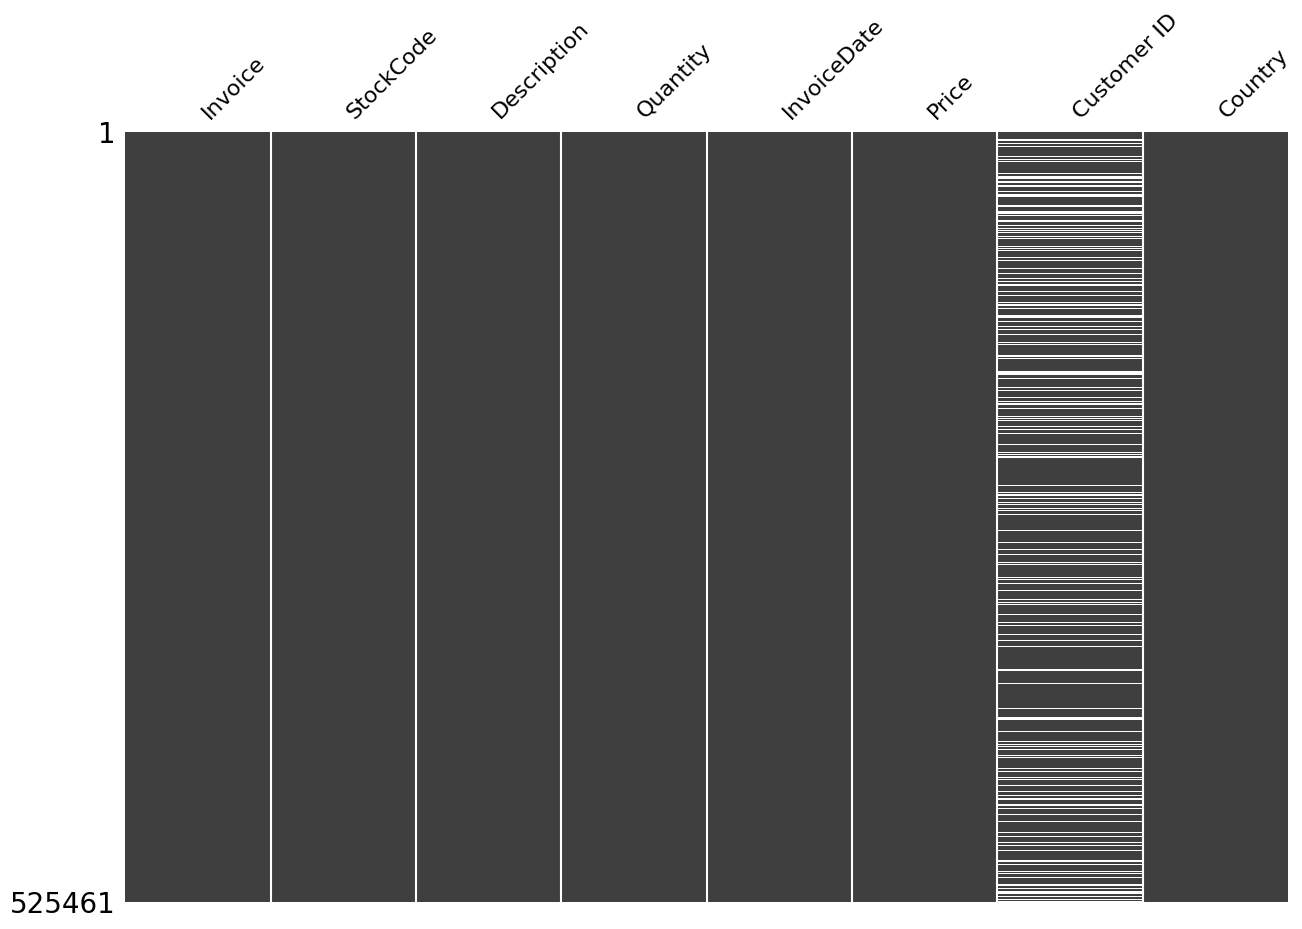

In [37]:
profile_df(df_retail)

En cuanto al análisis multivariado, se tiene que para el gráfico de dispersión dentre ```Quantity v/s InvoiceDate``` muestra que, en general, para todas las fechas se tiene un número de compras bajo, dado que la gente no suele comprar muchos productos. También se observan valores extremos que podrían ser outliers y, eventualmente, quitarse al momento de realizar una análisis. Por otro lado, entre Septiembre y Noviembre hay una especie de simetría en los datos, por lo que puede que ese día se hayan duplicado los datos con signo contrario.

Para el segundo gráficos ```Quantity v/s Price``` se tiene un comportamiento esperado en general. Se muestra que que a menores precios más cantidad de ventas y a mayor precio, menor cantidad de ventas. Se tienen valores negativos para ambas variables, lo que es un error.

El tercer gráfico muestra ```InvoiceDate v/s Price``` se tiene un comportamiento general que muestra que las ventas para todos los días son en general de bajos precioos. Notar que hay precios negativos, que es un error.

El cuarto gráfico es una matrix de correlación, que sirve para ver si hay correlación entre las columnas del dataframe. Es evidente notar que la diagonal tiene una correlación 1, dado que se hace entre ambas variables. Al ver los valores distintos de la diagonal se obtiene un color azul, lo que muestra que no hay mucha correlación entre las variables de estudio.

Finalmente, el gráfico Missing Matrix muestra los valores nulos por columnas, donde se tiene una gran cantidad de estos en la columna ```Costumer ID```, que era lo que se había visto en el análisis univariables. Las demás series no muestran nulos, tal como se esperaba.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [74]:
def clean_df (df, columns = ['Price','Quantity']):
    df_cleaned = df.copy()
    #Eliminación de valores menores a cero e iguales pq está raro que algo cueste 0, aplicado a price y quantity.
    df_cleaned = df_cleaned[df_cleaned[columns[0]] > 0]
    df_cleaned = df_cleaned[df_cleaned[columns[1]] > 0]
    # Borrar outliers
    out_price_index = df_cleaned[columns[0]].loc[(np.abs(stats.zscore(df_cleaned[columns[0]])) >= 3)].index
    df_cleaned = df_cleaned.drop(out_price_index)
    out_quantity_index = df_cleaned[columns[1]].loc[(np.abs(stats.zscore(df_cleaned[columns[1]])) >= 3)].index
    df_cleaned = df_cleaned.drop(out_quantity_index)
    return df_cleaned

df_retail_2 = clean_df(df_retail)

In [76]:
print(f'Las columnas del dataframe son: {np.array(df_retail_2.columns)}')

Las columnas del dataframe son: ['Invoice' 'StockCode' 'Description' 'Quantity' 'InvoiceDate' 'Price'
 'Customer ID' 'Country']


In [77]:
profile_serie(df_retail_2['Quantity'])
profile_serie(df_retail_2['Price'])

## Quantity Profile

Type                              int64
Number of observations         509456.0
Mean                            8.96922
Std                           18.354661
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                               271.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          55.355607
Skew                            6.39254
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   509420
Duplicate rows (%)              99.99 %
Total size in memory      8151296 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         509456.0
Mean                            3.53497
Std                            5.280004
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                              195.22
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                         339.428012
Skew                          13.625068
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   508894
Duplicate rows (%)              99.89 %
Total size in memory      8151296 bytes
dtype: object

## Bivariant Analysis:

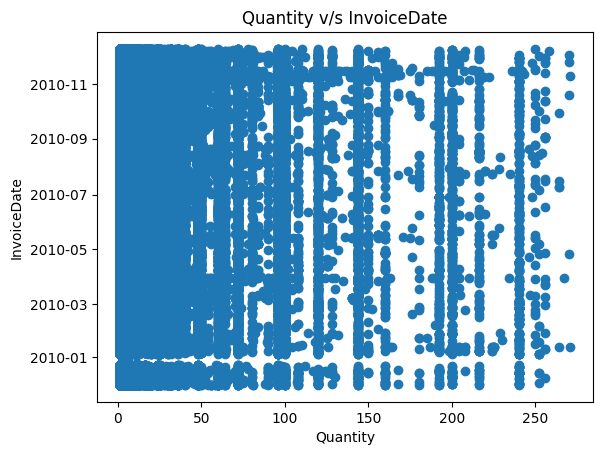

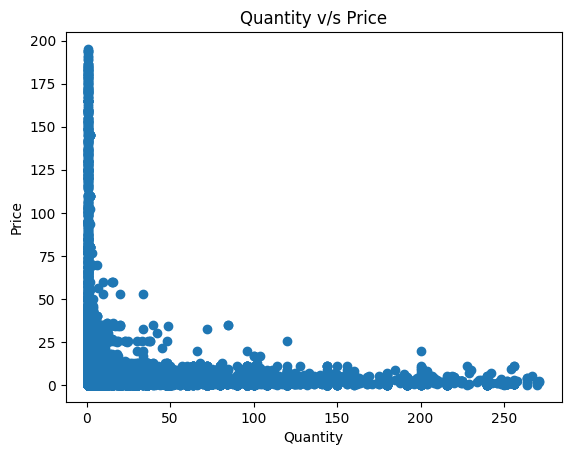

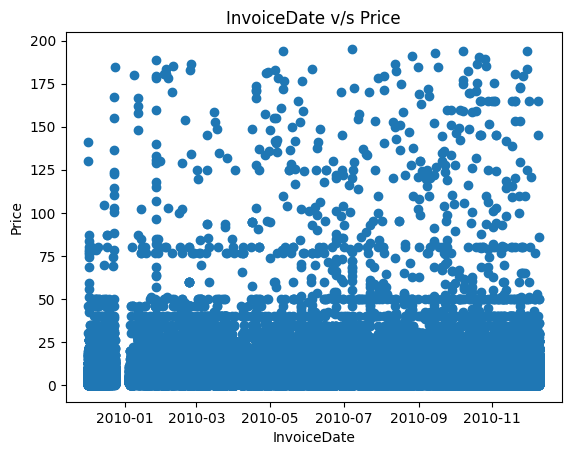

## Correlation:

## Missing Matrix:

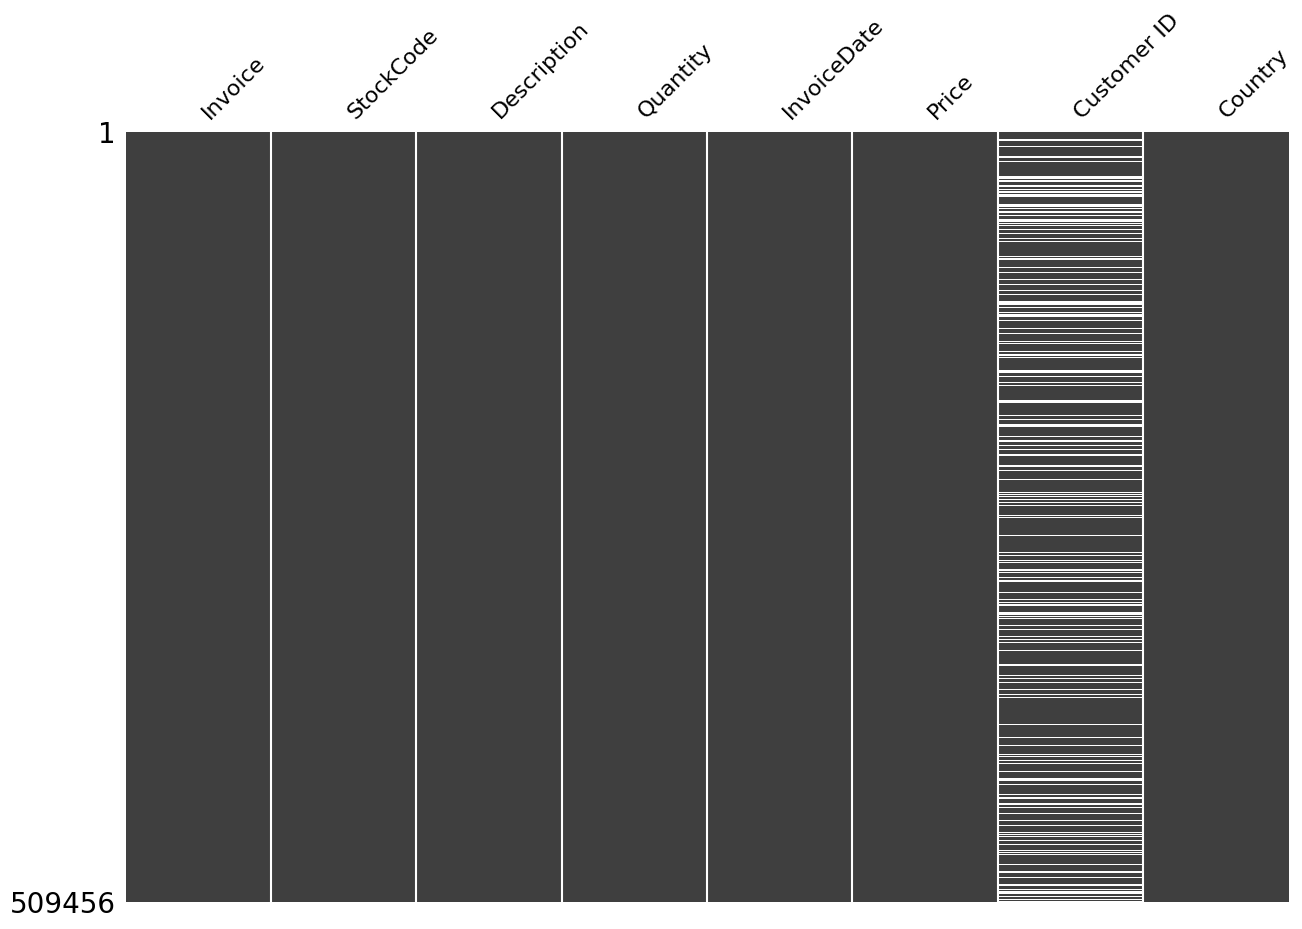

In [78]:
profile_df(df_retail_2)

Para el análisis univariable de la serie ```Price``` y ```Quantity``` se ven cambios esperados, ya no se tienen valores menores o iguales a cero en precio y cantidad. Por otro lado, ya no se tiene la gran cantidad de outliers que se tenían antes, dado que se aplicó el mismo método que se aplica en un comienzo para eliminar en cada serie. Es por esto que cambian las estadísticas de las series.

Al revisar el análisis multivariado es posible ver del primer gráfico que no hay días en especial en el que se vendan más cantidades, del gráfico 2 es posible ver cómo para precios altos se venden menos cantidades y para precios altos se venden más cantidades, el gráfico 3 muestra como en todos los días (excepto 1 donde no hay ventas) se comprar insumos de precios en general bajos. La matriz de correlación en este caso muestra que hay correlación entre variables, cosa que no sucedía en el caso anterior. Se tiene que ```InvoiceDate``` se correlaciona con ```Price``` y ```Quantity```.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [79]:
import plotly.graph_objects as go

df_retail_2['Ganancia'] = df_retail_2['Price']*df_retail_2['Quantity']

top_30 = (df_retail_2.groupby('Description')[['Ganancia', 'Quantity']].sum().sort_values(by= 'Ganancia', ascending = False))[1:31]

trace1 = go.Bar(x=top_30.index, y=top_30['Ganancia'], name='Ganancia')
trace2 = go.Bar(x=top_30.index, y=top_30['Quantity'], name='Quantity')

# Create a bar plot
fig = go.Figure(data=[trace1, trace2])
fig.update_layout(
    title='Top 30 Productos que generan más Ganancia',
    xaxis_title='Producto'
)
fig.show()

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [80]:
def plot_ventas(df):
    df['Date'] = df['InvoiceDate'].dt.floor('D').dt.strftime('%Y/%m/%d')
    unique_rows = df[~df['Invoice'].duplicated(keep=False)]
    df_out = unique_rows.groupby('Date')['Invoice'].count().reset_index(name='counts')
    print(len(df_out['Date']))
    fig = go.Figure(data=go.Scatter(x=df_out['Date'], y=df_out['counts'], mode='lines'))
    fig.update_layout(
    title='Ventas por Día',
    xaxis_title='Fecha',
    yaxis_title='N° de venta'
    )
    fig.show()
    return 

In [89]:
df_retail_2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Ganancia,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009/12/01
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009/12/01
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009/12/01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009/12/01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009/12/01
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2.0,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,2010/12/09
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010/12/09
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010/12/09
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,2010/12/09


In [91]:
plot_ventas(df_retail_2)

307


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>